<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 3. Espacios de Color</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>28 de Febrero de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ol style="font-size:120%; line-height : 35px;">
<li>
    <h4>Estudiar los diferentes espacios de color que tiene OpenCV, utilizando imágenes de su proyecto.</h4>
</li>
<li>
    <h4>Implementar, como una función para OpenCV, las conversiones entre los espacios de color siguientes:</h4>
    <ul>
        <li>RGB a LUX y su inversa</li>
        <li>RGB a OHTA y su inversa</li>
    </ul>
    Evaluarlas en su proyecto o en aplicaciones a detección de rostros y de segmentación de productos, respectivamente.
</li>
</ol>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

<h2>Los diferentes espacios de color que tiene OpenCV</h2>
<ol>
<ul>
<li> OpenCV tiene la funcion 
```
cv2.cvtColor(img, cv2.COLOR_RBG...)
```, para convertir entre modelos de color
</li>
<li> Los modelos de control estudiados en esta documento son: RGB, GRAY, HSV, HLS, LUV, XYZ, YCrCb, LAB, YUV </li>
<li> Todos los modelos son comparados de la siguiente conversion RGB $<=>$ MODELO DE COLOR </li>
</ul>
</ol>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

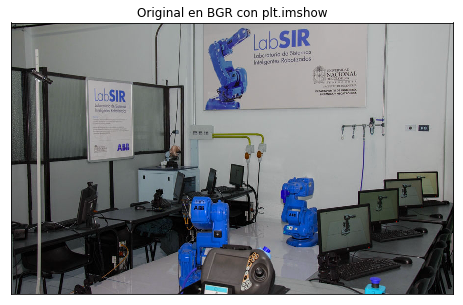

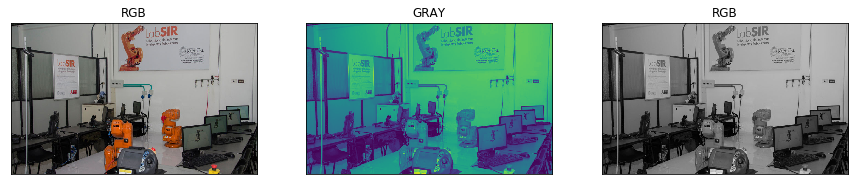

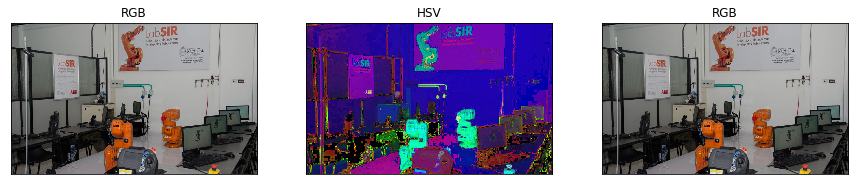

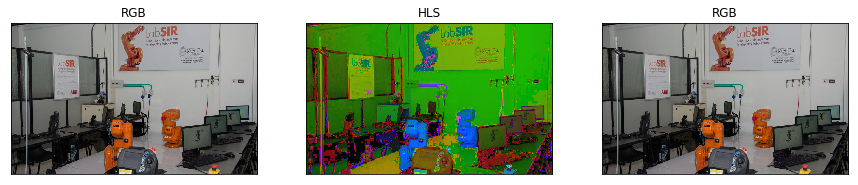

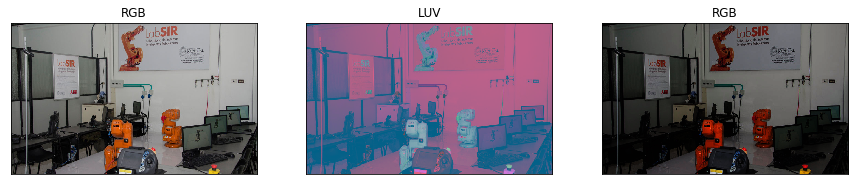

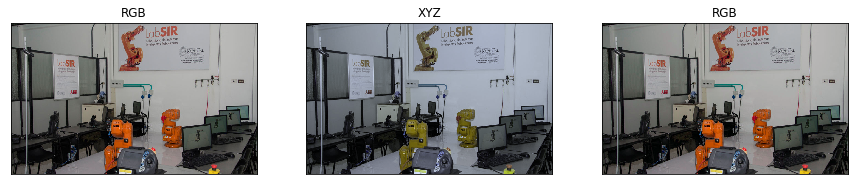

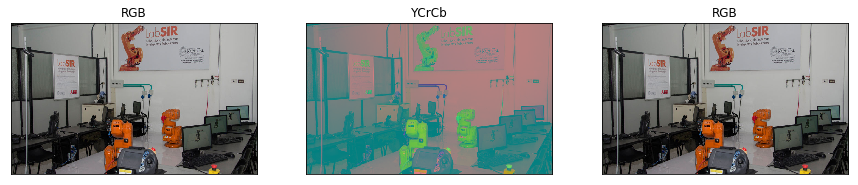

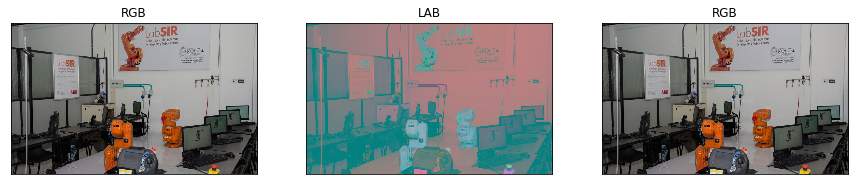

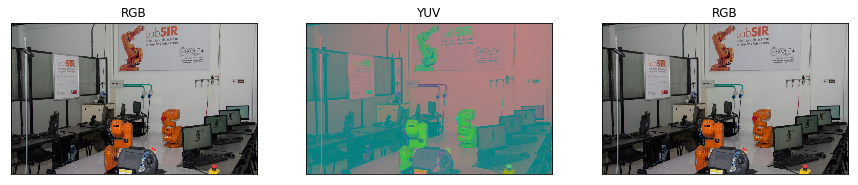

In [2]:
images = ['../tarea01/ABBpicking.jpg',
          '../tarea01/labSIR.jpg',
          '../tarea01/BIOLOIDpostures.jpg',
          '../tarea01/NAOpostures.jpg',
          'evangeline-lilly.jpg',
          'straw.jpg']

imgo = cv2.imread(images[1],cv2.IMREAD_COLOR)
imgo2rgb = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

def printColorConvertion(fig,model_str,img,c,c_1):
    img2 = cv2.cvtColor(img, c)
    img3 = cv2.cvtColor(img2, c_1)
    plt.figure(fig,figsize=(15,5))
    plt.subplot(131),plt.imshow(img)
    plt.title('RGB'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img2)
    plt.title(model_str), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(img3)
    plt.title('RGB'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

plt.figure(1,figsize=(15,5))
plt.imshow(imgo)
plt.title('Original en BGR con plt.imshow'), plt.xticks([]), plt.yticks([])
plt.show()
printColorConvertion(2,'GRAY',imgo2rgb,cv2.COLOR_RGB2GRAY,cv2.COLOR_GRAY2RGB)
printColorConvertion(3,'HSV',imgo2rgb,cv2.COLOR_RGB2HSV, cv2.COLOR_HSV2RGB)
printColorConvertion(4,'HLS',imgo2rgb,cv2.COLOR_RGB2HLS, cv2.COLOR_HLS2RGB)
printColorConvertion(5,'LUV',imgo2rgb,cv2.COLOR_RGB2LUV, cv2.COLOR_LUV2LRGB)
printColorConvertion(6,'XYZ',imgo2rgb,cv2.COLOR_RGB2XYZ, cv2.COLOR_XYZ2RGB)
printColorConvertion(7,'YCrCb',imgo2rgb,cv2.COLOR_RGB2YCrCb, cv2.COLOR_YCrCb2RGB)
printColorConvertion(8,'LAB',imgo2rgb,cv2.COLOR_RGB2LAB, cv2.COLOR_LAB2RGB)
printColorConvertion(9,'YUV',imgo2rgb,cv2.COLOR_RGB2YUV, cv2.COLOR_YUV2RGB)


<h3>RGB a LUX y viceversa</h3>
<ul style="font-size:140%; line-height : 25px;">
  <li>El nombre **LUX** viene del acrónimo **L**ogarithmic h**U**e e**X**tension, dado que es un espacio de color no-lineal, que está basado en una función logarítmica. Este espacio de color tiene buen desempeño en la dectección de piel.</li>
  <li>La conversión entre RGB y LUX se realiza de la siguiente manera: </li>
</ul>

<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $L=(R+1)^{0.3}(G+1)^{0.6}(B+1)^{0.1}-1 $</p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $U = \left \{ \begin{matrix} \frac{M}{2}(\frac{R+1}{L+1}) & \mbox{si }R<L \\  M-\frac{M}{2}(\frac{L+1}{R+1}) & \mbox{cualquier otro caso}\end{matrix}\right.$ </p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $X = \left \{ \begin{matrix} \frac{M}{2}(\frac{B+1}{L+1}) & \mbox{si }B<L \\  M-\frac{M}{2}(\frac{L+1}{B+1}) & \mbox{cualquier otro caso}\end{matrix}\right.$ </p>

<ul style="font-size:140%; line-height : 25px;">
  <li>donde $M$ es el rango dinámico de los niveles de gris, para una codificación de 8 bits M = 256.</li>
</ul>

<ul style="font-size:140%; line-height : 25px;">
  <li>Debido a la alta no linealidad su versión inversa no es sencilla</li>
</ul>

<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> 
$R = \left \{ \begin{matrix} \frac{2U}{M}(L+1)-1 & \mbox{si }\frac{2U}{M}<1 \\  \frac{M}{2}\frac{L+1}{M-U}-1 & \mbox{cualquier otro caso}\end{matrix}\right.$ 
</p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> 
$G=\left(\frac{L+1}{(R+1)^{0.3}(B+1)^{0.1}}\right)^{-0.6}-1$
</p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> 
$B = \left \{ \begin{matrix} \frac{2X}{M}(L+1)-1 & \mbox{si }\frac{2X}{M}<1 \\  \frac{M}{2}\frac{L+1}{M-X}-1 & \mbox{cualquier otro caso}\end{matrix}\right.$ 
</p>

<ul style="font-size:140%; line-height : 25px;">
  <li>Como se muestra a continuación el canal hUe, resalta tanto la estructura metálica del robot, como las características principales del rostro y la piel en especial las facciones alrededor de la boca, los ojos y labios.</li>
</ul>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

/home/jackmaster/.local/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/home/jackmaster/.local/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/home/jackmaster/.local/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide
/home/jackmaster/.local/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide


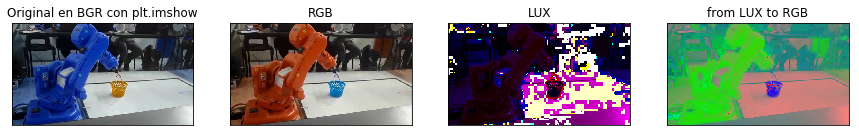

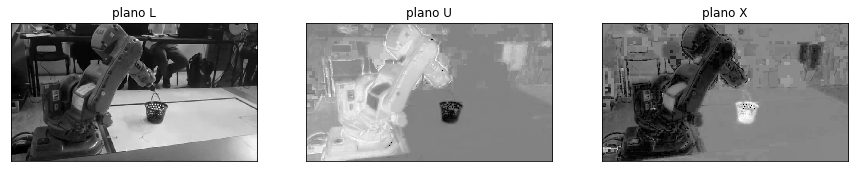

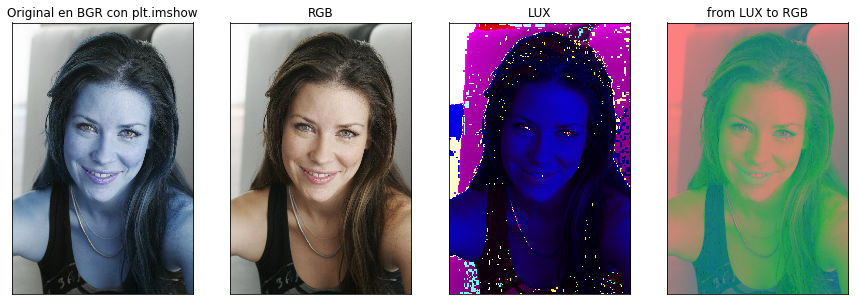

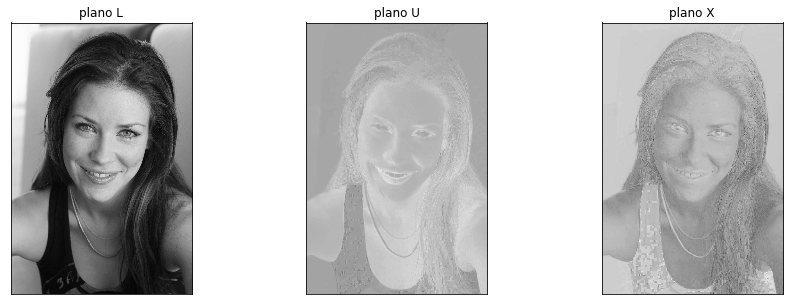

In [3]:
def RGB2lux(im, M=256):
    lux = np.zeros_like(im)
    R=im[:,:,0]; G=im[:,:,1]; B=im[:,:,2]
    # Log channel
    L = np.power(R+1,0.3)*np.power(G+1,0.6)*np.power(B+1,0.1)-1
    # uHe channel
    U = np.zeros_like(L)
    U[L>R] = M/2*((R[L>R]+1)/(L[L>R]+1))
    U[L<=R] = M-M/2*((L[L<=R]+1)/(R[L<=R]+1))
    # eXtension channel
    X = np.zeros_like(L)
    X[L>B] = M/2*((B[L>B]+1)/(L[L>B]+1))
    X[L<=B] = M-M/2*((L[L<=B]+1)/(B[L<=B]+1))
    # new image
    lux[:,:,0]=L; lux[:,:,1]=U; lux[:,:,2]=X    
    return (lux)

def lux2RGB(im, M=256):
    rgb = np.zeros_like(im)
    L=im[:,:,0]; U=im[:,:,1]; X=im[:,:,2]
    R = rgb[:,:,0]; G = rgb[:,:,1]; B = rgb[:,:,2];
    # gettin red channel
    Kr = 2*U/M;
    R_less_L = Kr<1;
    R[R_less_L] = Kr[R_less_L]*(L[R_less_L]+1)-1
    R_geq_L = Kr>=1
    R[R_geq_L] = (M/2)*(L[R_geq_L]+1)/(M-U[R_geq_L])-1
    # gettin blue channel
    Kb = 2*X/M;
    B_less_L = Kb<1;
    B[B_less_L] = Kb[B_less_L]*(L[B_less_L]+1)-1
    B_geq_L = Kb>=1
    B[B_geq_L] = (M/2)*(L[B_geq_L]+1)/(M-X[B_geq_L])-1
    # getting green channel
    G = np.power((L+1)/(np.power(R+1,0.3)*np.power(B+1,0.1)),-0.6)-1
    # new image
    rgb[:,:,0] = R; rgb[:,:,1] = G; rgb[:,:,2] = B;
    return rgb

imgo=cv2.imread(images[0],cv2.IMREAD_COLOR)
imgo2rgb = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
imgrgb2lux=RGB2lux(imgo2rgb)
imglux2rgb=lux2RGB(imgrgb2lux)

plt.figure(1,figsize=(15,5))
plt.subplot(141),plt.imshow(imgo)
plt.title('Original en BGR con plt.imshow'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(imgo2rgb)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(imglux2rgb)
plt.title('LUX'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imgrgb2lux)
plt.title('from LUX to RGB'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(2,figsize=(15,5))
plt.subplot(131),plt.imshow(imgrgb2lux[:,:,0], cmap='gray', interpolation="none")
plt.title('plano L'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgrgb2lux[:,:,1], cmap='gray', interpolation="none")
plt.title('plano U'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(imgrgb2lux[:,:,2], cmap='gray', interpolation="none")
plt.title('plano X'), plt.xticks([]), plt.yticks([])
plt.show()

imgo=cv2.imread(images[4],cv2.IMREAD_COLOR)
imgo2rgb = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
imgrgb2lux=RGB2lux(imgo2rgb)
imglux2rgb=lux2RGB(imgrgb2lux)

plt.figure(1,figsize=(15,5))
plt.subplot(141),plt.imshow(imgo)
plt.title('Original en BGR con plt.imshow'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(imgo2rgb)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(imglux2rgb)
plt.title('LUX'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imgrgb2lux)
plt.title('from LUX to RGB'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(2,figsize=(15,5))
plt.subplot(131),plt.imshow(imgrgb2lux[:,:,0], cmap='gray', interpolation="none")
plt.title('plano L'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgrgb2lux[:,:,1], cmap='gray', interpolation="none")
plt.title('plano U'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(imgrgb2lux[:,:,2], cmap='gray', interpolation="none")
plt.title('plano X'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>RGB a OHTA y viceversa</h3>

<ul style="font-size:140%; line-height : 25px;">
  <li>Es una transformación lineal, obtenida despúes de haberse realizado un análisis colorométrico de 8 espacios de color, es altamente usado en la segmentación de imágenes.</li>
  <li>La conversión entre RGB y $I_1,I_2,I_3$ OHTA se realiza de la siguiente manera: </li>
</ul>

<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $I_1=\frac{1}{3}(R+G+B)$ </p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $I_2=\frac{1}{2}(R-B)$</p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $I_3=\frac{1}{4}(2G-R-B)$</p>

<ul style="font-size:140%; line-height : 25px;">
  <li>La conversión inversa: </li>
</ul>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $R=I_1+\frac{4}{3}I_3$ </p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $G=I_1+2I_2-\frac{8}{3}I_3$</p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $B=I_1-2I_2+\frac{4}{3}I_3$</p>


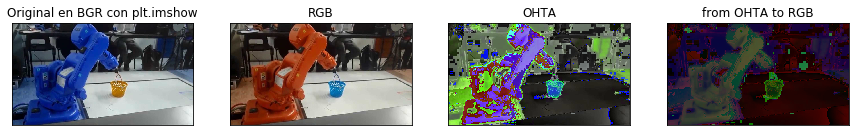

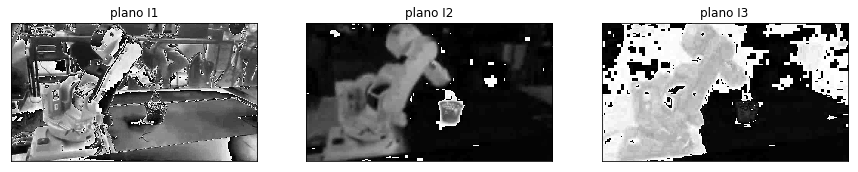

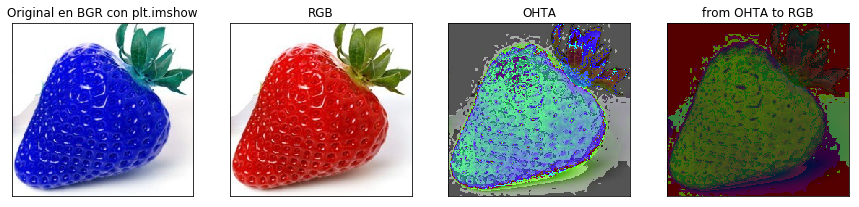

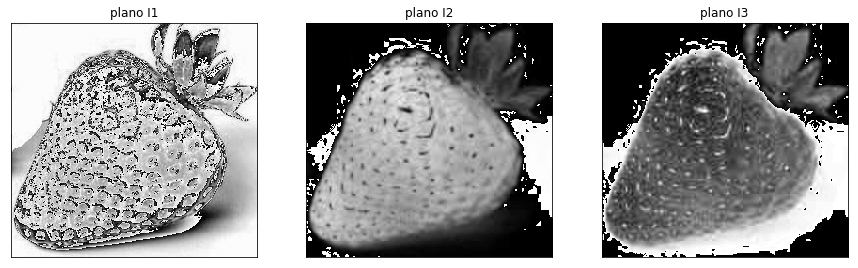

In [4]:
def RGB2ohta(im):
    ohta = np.zeros_like(im)
    R=im[:,:,0]; G=im[:,:,1]; B=im[:,:,2]
    ohta[:,:,0]=1./3*(R+G+B)
    ohta[:,:,1]=1./2*(R-B)
    ohta[:,:,2]=1./4*(2*G-R-B)
    
    return (ohta)

def ohta2RGB(im):
    rgb = np.zeros_like(im)
    I1=im[:,:,0]
    I2=im[:,:,1]
    I3=im[:,:,2]
    rgb[:,:,0]=I1+4./3.*I3
    rgb[:,:,1]=I1+2*I2-8./3.*I3
    rgb[:,:,2]=I1-2*I2+4./3.*I3
    
    return (rgb)

imgo=cv2.imread(images[0],cv2.IMREAD_COLOR)
imgo2rgb = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
imgrgb2ohta=RGB2ohta(imgo2rgb)
imgohta2rgb=ohta2RGB(imgrgb2ohta)

plt.figure(1,figsize=(15,5))
plt.subplot(141),plt.imshow(imgo)
plt.title('Original en BGR con plt.imshow'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(imgo2rgb)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(imgohta2rgb)
plt.title('OHTA'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imgrgb2ohta)
plt.title('from OHTA to RGB'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(2,figsize=(15,5))
plt.subplot(131),plt.imshow(imgrgb2ohta[:,:,0], cmap='gray', interpolation="none")
plt.title('plano I1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgrgb2ohta[:,:,1], cmap='gray', interpolation="none")
plt.title('plano I2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(imgrgb2ohta[:,:,2], cmap='gray', interpolation="none")
plt.title('plano I3'), plt.xticks([]), plt.yticks([])
plt.show()

imgo=cv2.imread(images[5],cv2.IMREAD_COLOR)
imgo2rgb = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
imgrgb2ohta=RGB2ohta(imgo2rgb)
imgohta2rgb=ohta2RGB(imgrgb2ohta)

plt.figure(1,figsize=(15,5))
plt.subplot(141),plt.imshow(imgo)
plt.title('Original en BGR con plt.imshow'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(imgo2rgb)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(imgohta2rgb)
plt.title('OHTA'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imgrgb2ohta)
plt.title('from OHTA to RGB'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(2,figsize=(15,5))
plt.subplot(131),plt.imshow(imgrgb2ohta[:,:,0], cmap='gray', interpolation="none")
plt.title('plano I1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgrgb2ohta[:,:,1], cmap='gray', interpolation="none")
plt.title('plano I2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(imgrgb2ohta[:,:,2], cmap='gray', interpolation="none")
plt.title('plano I3'), plt.xticks([]), plt.yticks([])
plt.show()
